# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Angeline Aurelia
- **Email:** s160422031@student.ubaya.ac.id
- **ID Dicoding:** angelineaureliaa

## Menentukan Pertanyaan Bisnis

- Per tahunnya, pada season apakah terdapat angka rental terbanyak?
- Bagaimana pengaruh jam dan hari dalam angka rental?

## Import Semua Packages/Library yang Digunakan

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [3]:
day_df = pd.read_csv('day.csv') #load day.csv
day_df.head() #tampilkan 5 baris pertama dalam day_df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [4]:
hour_df = pd.read_csv('hour.csv') #load hour.csv
hour_df.head() #tampilkan 5 baris pertama dalam hour_df

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Pada tahap gathering data, telah memuat tabel day dan hour

### Assessing Data

In [8]:
day_df.info() #untuk menilai tipe data dari tiap kolom & melihat non-null value dari tiap kolom day_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [9]:
hour_df.info() #untuk menilai tipe data dari tiap kolom & melihat non-null value dari tiap kolom hour_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [11]:
#Menghitung jumlah duplikasi data dari tiap tabel

print("Jumlah duplikasi: ", day_df.duplicated().sum())
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0
Jumlah duplikasi:  0


In [12]:
day_df.describe() #untuk melihat pameter statistik per kolom dari day_df

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [13]:
hour_df.describe() #untuk melihat pameter statistik per kolom dari hour_df

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Seluruh kolom pada day_df, jumlah non-null sudah sesuai dengan jumlah data yaitu 731 sehingga tidak terdapat missing values
- Seluruh kolom pada hour_df, jumlah non-null sudah sesuai dengan jumlah data yaitu 17379 sehingga tidak terdapat missing values
- Tipe data dteday pada kedua tabel memiliki tipe data object, dimana seharusnya bertipe date time
- Tidak ada keanehan pada parameter statistik per kolom dari kedua tabel

### Cleaning Data

In [7]:
#ganti tipe data dteday pada day_df dan hour_df

day_df["dteday"] = pd.to_datetime(day_df["dteday"])
hour_df["dteday"] = pd.to_datetime(hour_df["dteday"])

**Insight:**
- Mengganti tipe data dteday menjadi date time

## Exploratory Data Analysis (EDA)

### Explore ...

In [14]:
day_df.describe(include = "all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


**Insight:**
- Berdasarkan rangkuman parameter statistik day_df, dapat diperolah informasi bahwa catatan rental yang digunakan adalah catatan selama 731 hari dimulai dari tanggal 1 Januari 2011, dan rata - rata temperatur selama 731 hari adalah  0.495385 * 41 derajat Celcius yaitu sekitar 20,31 derajat Celcius, serta rata - rata pengguna biasa yang melakukan rental per hari adalah sebanyak kurang lebih 848 orang, dan rata - rata pengguna registered yang melakukan rental per hari adalah sebanyak kurang lebih 3656 orang. Terakhir, rata - rata total pengguna (biasa & registered) sepeda rental per hari sebanyak kurang lebih 4504 orang

In [8]:
day_df.groupby(by = ["season", "yr"]).agg({
    "casual": ["min", "max", "mean", "sum"],
    "registered": ["min", "max", "mean", "sum"],
    "cnt": ["min", "max", "mean", "sum"]
})

casual                            registered                     \
             min   max         mean     sum        min   max         mean   
season yr                                                                   
1      0       9  1424   238.055556   21425        416  2841  1428.611111   
       1       9  3155   430.736264   39197        432  5315  3100.560440   
2      0     121  2355   843.086957   77564        674  4414  2932.086957   
       1     120  3410  1369.108696  125958        907  6456  4840.380435   
3      0     118  3065  1015.425532   95450        889  4614  3448.936170   
       1     371  3160  1389.797872  130641       3195  6917  5434.446809   
4      0      50  2397   593.404494   52813        570  4372  3071.056180   
       1       2  3031   864.820225   76969         20  6946  4927.044944   

                    cnt                             
              sum   min   max         mean     sum  
season yr                                           
1      0   128575   431  3239  1666.666667  150000  
       1   282151   441  7836  3531.296703  321348  
2      0   269752   795  5805  3775.173913  347316  
       1   445315  1027  8362  6209.489130  571273  
3      0   324200  1115  6043  4464.361702  419650  
       1   510838  4073  8714  6824.244681  641479  
4      0   273324   627  5511  3664.460674  326137  
       1   438507    22  8555  5791.865169  515476

**Insight**
- Berdasarkan pivot table di atas, dapat diperoleh informasi jumlah minimal penyewa, maksimal penyewa, rata - rata penyewa, dan jumlah penyewa bike per season per tahunnya berdasarkan tipe penyewa
- Didapat bahwa jumlah rental casual terbanyak ada pada season 3 yaitu fall pada tahun 2012, jumlah rental registered terbanyak ada pada season 3 yaitu fall 2012, dan jumlah rental total terbanyak ada pada season 3 yaitu fall tahun 2012 juga

In [7]:
day_df.groupby(by = ["mnth"]).agg({
    "cnt": "sum"
})

,cnt
mnth,
1,134933
2,151352
3,228920
4,269094
5,331686
6,346342
7,344948
8,351194
9,345991


**Insight**
- Berdasarkan pivot table di atas, dapat diperoleh informasi jumlah penyewa bike per bulannya, akumulasi tahun 2011 dan 2012
- Didapat bahwa jumlah rental bike terbanyak jatuh pada bulan 8 yaitu Agustus

In [9]:
hour_df.groupby(by = ["hr"]).agg({
    "cnt": "sum"
})

,cnt
hr,
0,39130
1,24164
2,16352
3,8174
4,4428
5,14261
6,55132
7,154171
8,261001


**Insight**
- Berdasarkan pivot table di atas, dapat diperoleh informasi jumlah penyewa bike per jam nya selama tahun 2011 dan 2012
- Didapat bahwa jumlah rental bike terbanyak ada pada jam 0 yaitu jam 12 malam

In [14]:
hour_df.groupby(['hr', 'weekday'])['cnt'].mean().sort_values(ascending=False)

hr  weekday
17  2          544.278846
    4          527.346154
18  2          517.567308
17  3          513.144231
    1          502.394231
                  ...    
3   1            5.113402
    4            5.071429
4   3            4.968750
3   3            4.888889
    2            4.152174
Name: cnt, Length: 168, dtype: float64

**Insight**
- Berdasarkan pivot table di atas, dapat diperoleh informasi jumlah rata - rata penyewa bike berdasarkan jam dan hari
- Didapat bahwa jumlah rata - rata rental bike terbanyak ada pada jam 17 hari 2 yaitu hari Rabu jam 5 sore dan jumlah rata - rata rental bike terkecil ada pada jam 3 hari 2 yaitu hari Rabu jam 3 pagi

In [15]:
day_df.groupby('holiday')['cnt'].sum().sort_values(ascending=False)

,cnt
holiday,
0,3214244
1,78435


**Insight**
- Berdasarkan pivot table di atas, dapat diperoleh informasi jumlah total penyewa bike berdasarkan holiday atau tidak
- Didapat bahwa jumlah total rental bike lebih banyak terjadi pada season yang bukan holiday

In [16]:
day_df.groupby('workingday')['cnt'].sum().sort_values(ascending=False)

,cnt
workingday,
1,2292410
0,1000269


**Insight**
- Berdasarkan pivot table di atas, dapat diperoleh informasi jumlah total penyewa bike berdasarkan hari kerja atau tidak
- Didapat bahwa jumlah total rental bike lebih banyak terjadi pada hari - hari kerja

In [17]:
day_df[day_df.cnt == day_df.cnt.min()]

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
667,668,2012-10-29,4,1,10,0,1,1,3,0.44,0.4394,0.88,0.3582,2,20,22


**Insight**
- Berdasarkan pivot table di atas, didapat informasi tentang kolom dimana jumlah total penyewa bike paling sedikit yaitu jatuh pada tanggal 29 Oktober 2012 pada season 4 yaitu winter
- Hal ini dapat didasarkan oleh beberapa faktor, yaitu season winter, hari kerja, weather 3 (Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds), dan faktor - faktor eksternal lainnya

## Visualization & Explanatory Analysis

### Pertanyaan 1: Per tahunnya, pada season apakah terdapat angka rental terbanyak?

<ipython-input-20-21d28d99747b>:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='season', y='cnt', hue='yr', data=data, ci=None)


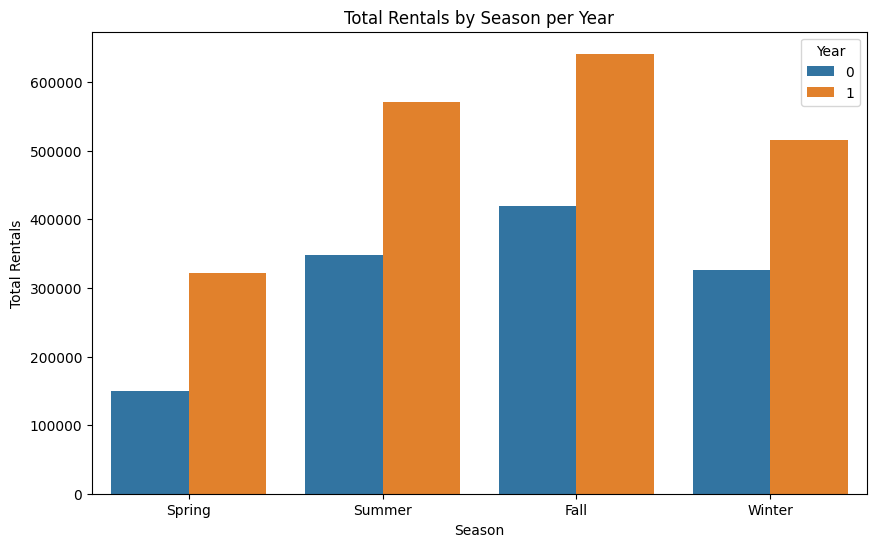

In [20]:
data = day_df.groupby(['season', 'yr'])['cnt'].sum().reset_index()

plt.figure(figsize=(10, 6))

sns.barplot(x='season', y='cnt', hue='yr', data=data)

plt.title('Total Rentals by Season per Year')
plt.xlabel('Season')
plt.ylabel('Total Rentals')
plt.xticks(ticks=[0, 1, 2, 3], labels=['Spring', 'Summer', 'Fall', 'Winter'])
plt.legend(title='Year')
plt.show()


### Pertanyaan 2: Bagaimana pengaruh jam dan hari dalam angka rental?

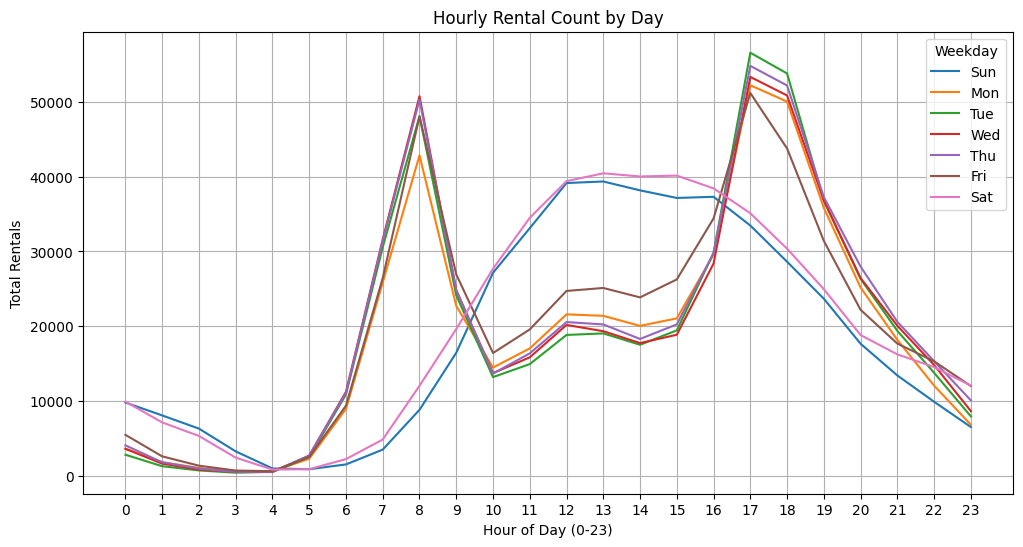

In [26]:
data = hour_df.groupby(['hr', 'weekday'])['cnt'].sum().reset_index()

plt.figure(figsize=(12, 6))

for day in range(7):
    day_data = data[data['weekday'] == day]
    plt.plot(day_data['hr'], day_data['cnt'])

plt.title('Hourly Rental Count by Day')
plt.xlabel('Hour of Day (0-23)')
plt.ylabel('Total Rentals')
plt.xticks(range(0, 24))
plt.legend(title='Weekday', loc='upper right', labels=['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat'])
plt.grid()
plt.show()


**Insight:**
- Berdasarkan visualisasi pertanyaan 1, dapat dilihat bahwa jumlah rental bike terbanyak per tahunnya untuk tahun 2011 ada pada season Fall, dan untuk tahun 2012 juga ada pada season Fall
- Berdasarkan visualisasi pertanyaan 2, berdasarkan jam dan hari rental, dapat dilihat bahwa jam rental terbanyak ada pada jam 17 pada hari - hari weekday, dan jam rental tersedikit ada pada jam 2 hingga 4 pagi pada hari - hari weekday

RFM Analysis

In [8]:
import datetime as dt

today = day_df['dteday'].max() + pd.Timedelta(days=1)

rfm_df = day_df.groupby('dteday').agg({
    'cnt': 'sum',
}).reset_index()

rfm_df['Recency'] = (today - rfm_df['dteday']).dt.days

rfm_df['Frequency'] = rfm_df['cnt']

print(rfm_df[['dteday', 'Recency', 'Frequency']])

        dteday  Recency  Frequency
0   2011-01-01      731        985
1   2011-01-02      730        801
2   2011-01-03      729       1349
3   2011-01-04      728       1562
4   2011-01-05      727       1600
..         ...      ...        ...
726 2012-12-27        5       2114
727 2012-12-28        4       3095
728 2012-12-29        3       1341
729 2012-12-30        2       1796
730 2012-12-31        1       2729

[731 rows x 3 columns]


**Insight**
- Analisis lanjutan dilakukan menggunakan RFM Analysis dimana hanya dilakukan perhitungan untuk recency dan frequency. Monetary tidak bisa dihitung karena tidak ada kolom pendapatan pada tabel. Recency dihitung berdasarkan jumlah hari sejak tanggal terakhir rental untuk tiap kolom dan Frequency dihitung menggunakan total rental dari setiap tanggal

## Conclusion

- Conclusion pertanyaan 1: jumlah rental bike terbanyak per tahunnya untuk tahun 2011 ada pada season Fall, dan untuk tahun 2012 juga ada pada season Fall
- Conclusion pertanyaan 2: berdasarkan jam dan hari rental, dapat dilihat bahwa jam rental terbanyak ada pada jam 17 pada hari - hari weekday, dan jam rental tersedikit ada pada jam 2 hingga 4 pagi pada hari - hari weekday. Penurunan ini bisa disebabkan oleh jam rental yang bisa dibilang subuh atau faktor - faktor eksternal lainnya